# 1. Introducción

## 1.1. Descripción del proyecto

## 1.2. Descripción del dataset

# 2. Importar librerías

# 3. Carga de los datos y descripción general

## 3.1. Cargar el dataset

Se tienen 18 arhivos .mat, 9 de ellos sirven para el entrenamiento del modelo y los otros 9 para el testeo del modelo, por lo que se tendrán en arreglos distintos.

In [ ]:
import os
from scipy.io import loadmat
PATH = os.getcwd()
DATA_PATH = os.path.join(PATH, "data")
TRAIN_DATA_PATH = os.path.join(DATA_PATH, "train")
TEST_DATA_PATH = os.path.join(DATA_PATH, "test")
train_files = os.listdir(TRAIN_DATA_PATH)
test_files = os.listdir(TEST_DATA_PATH)
train_mat_files = []
for file in train_files:
    if file.endswith(".mat"):
        train_mat_files.append(loadmat(os.path.join(TRAIN_DATA_PATH, file)))
test_mat_files = []
for file in test_files:
    if file.endswith(".mat"):
        test_mat_files.append(loadmat(os.path.join(TEST_DATA_PATH, file)))
print(f"Se cargaron {len(train_mat_files)} archivos .mat de entrenamiento")
print(f"Se cargaron {len(test_mat_files)} archivos .mat de testeo")

Se cargaron 9 archivos .mat de entrenamiento
Se cargaron 9 archivos .mat de testeo


## 3.2. Inspección preliminar

In [ ]:
train_example = train_mat_files[0]
type(train_example)

dict

In [ ]:
train_example.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [ ]:
data_example = train_example["data"]
type(data_example)

numpy.ndarray

In [ ]:
data_example.shape

(1, 9)

Recordemos que los primeros 3 bloques contienen sesiones de EOG.

In [ ]:
example = data_example[0, 0]
type(example)

numpy.ndarray

In [ ]:
example.shape

(1, 1)

In [ ]:
aux = example[0, 0]
type(aux)

numpy.void

In [ ]:
aux.dtype

dtype([('X', 'O'), ('trial', 'O'), ('y', 'O'), ('fs', 'O'), ('classes', 'O'), ('artifacts', 'O'), ('gender', 'O'), ('age', 'O')])

Los bloques de EOG solo contienen datos de interés en X, ya que este contiene las señales EEG y EOG de los bloques correspondientes.

In [ ]:
aux["X"].shape, aux["fs"][0][0]

((30878, 25), 250)

Veamos un ejemplo de bloques de imaginación motora.

In [ ]:
example = data_example[0, 3]
type(example)

numpy.ndarray

In [ ]:
example.shape

(1, 1)

In [ ]:
aux = example[0, 0]
type(aux)

numpy.void

In [ ]:
aux.dtype

dtype([('X', 'O'), ('trial', 'O'), ('y', 'O'), ('fs', 'O'), ('classes', 'O'), ('artifacts', 'O'), ('gender', 'O'), ('age', 'O')])

En los bloques de EEG donde se realizó la imaginación motora se tiene más información de interés, estos son: X, trial, y, artifacts.

In [ ]:
import numpy as np
aux["X"].shape, aux["trial"].shape, np.unique(aux["y"]), np.unique(aux["artifacts"])

((96735, 25),
 (48, 1),
 array([1, 2, 3, 4], dtype=uint8),
 array([0, 1], dtype=uint8))

## 3.3. Preparación de los datos

In [ ]:
def extract_eog(data_dict):
    data = data_dict["data"]
    eog = []
    for i in range(3):
        eog.append(data[0, i][0, 0]["X"])
    return np.array(eog, dtype=object)

In [ ]:
def extract_eeg(data_dict):
    data = data_dict["data"]
    eeg = []
    for i in range(3, 9):
        eeg.append(data[0, i][0, 0]["X"])
    return np.array(eeg, dtype=object)

In [ ]:
def extract_trial(data_dict):
    data = data_dict["data"]
    trial = []
    for i in range(3, 9):
        trial.append(data[0, i][0, 0]["trial"])
    return np.array(trial, dtype=object)

In [ ]:
def extract_y(data_dict):
    data = data_dict["data"]
    y = []
    for i in range(3, 9):
        y.append(data[0, i][0, 0]["y"])
    return np.array(y, dtype=object)

In [ ]:
def extract_artifact(data_dict):
    data = data_dict["data"]
    artifact = []
    for i in range(3, 9):
        artifact.append(data[0, i][0, 0]["artifacts"])
    return np.array(artifact, dtype=object)

### 3.3.1. Sujeto 1

In [ ]:
eog_a01_train = extract_eog(train_mat_files[0])
eog_a01_test = extract_eog(test_mat_files[0])
eog_a01_train.shape, eog_a01_test.shape, eog_a01_train[0].shape, eog_a01_test[0].shape

((3,), (3,), (30878, 25), (24266, 25))

In [ ]:
eeg_a01_train = extract_eeg(train_mat_files[0])
eeg_a01_test = extract_eeg(test_mat_files[0])
eeg_a01_train.shape, eeg_a01_test.shape, eeg_a01_train[0].shape, eeg_a01_test[0].shape

((6, 96735, 25), (6, 96735, 25), (96735, 25), (96735, 25))

In [ ]:
trial_a01_train = extract_trial(train_mat_files[0])
trial_a01_test = extract_trial(test_mat_files[0])
trial_a01_train.shape, trial_a01_test.shape, trial_a01_train[0].shape, trial_a01_test[0].shape

((6, 48, 1), (6, 48, 1), (48, 1), (48, 1))

In [ ]:
y_a01_train = extract_y(train_mat_files[0])
y_a01_test = extract_y(test_mat_files[0])
y_a01_train.shape, y_a01_test.shape, y_a01_train[0].shape, y_a01_test[0].shape

((6, 48, 1), (6, 48, 1), (48, 1), (48, 1))

In [ ]:
artifact_a01_train = extract_artifact(train_mat_files[0])
artifact_a01_test = extract_artifact(test_mat_files[0])
artifact_a01_train.shape, artifact_a01_test.shape, artifact_a01_train[0].shape, artifact_a01_test[0].shape

((6, 48, 1), (6, 48, 1), (48, 1), (48, 1))

### 3.3.2. Sujeto 2

### 3.3.3. Sujeto 3

### 3.3.4. Sujeto 4

### 3.3.5. Sujeto 5

### 3.3.6. Sujeto 6

### 3.3.7. Sujeto 7

### 3.3.8. Sujeto 8

### 3.3.9. Sujeto 9

# 4. Limpieza de datos y pre-procesamiento

## 4.1. Segmentación de datos

In [ ]:
def extract_segmented_eeg(eegs, trials, artifacts):
    eeg_segmented = []
    for i, eeg in enumerate(eegs):
        for j, trial in enumerate(trials[i, :, :]):
            if j == len(trials[i, :, :]) - 1:
                sigs = eeg[trial[0]:, :]
            else:
                sigs = eeg[trial[0]:trials[i, j+1, :][0], :]
            if artifacts[i, j, :][0] == 0:
                eeg_segmented.append(sigs)
    return np.array(eeg_segmented, dtype=object)

In [ ]:
def extract_labels(labels, trials, artifacts):
    eeg_segmented = []
    for i, eeg in enumerate(labels):
        for j, trial in enumerate(trials[i, :, :]):
            if artifacts[i, j, :][0] == 0:
                eeg_segmented.append(labels[i, j, 0])
    return np.array(eeg_segmented, dtype=object)

Sabemos que el vector de trial indica el número de muestra desde el que empieza un movimiento imaginado, por ello se segmentará la data del EEG en 48 segmentos de diferentes tamaños. También se verificará si el tiempo en el que se dio la imaginación motora tuvo un artefacto. En caso de tenerlo, se elimina.

In [ ]:
eeg_segmented_a01_train = extract_segmented_eeg(eeg_a01_train, trial_a01_train, artifact_a01_train)
eeg_segmented_a01_test = extract_segmented_eeg(eeg_a01_test, trial_a01_test, artifact_a01_test)
eeg_segmented_a01_train.shape, eeg_segmented_a01_test.shape

((237,), (228,))

In [ ]:
y_a01_train = extract_labels(y_a01_train, trial_a01_train, artifact_a01_train)
y_a01_test = extract_labels(y_a01_test, trial_a01_test, artifact_a01_test)
y_a01_train.shape, y_a01_test.shape

((237,), (228,))

## 4.2. Eliminamos segmentos innecesarios

In [ ]:
def extract_motor_imagery(segments):
    new_segments = []
    for segment in segments:
        new_segments.append(segment[750:1500, :])
    return np.array(new_segments)

Sabemos del dataset que solo nos interesa el rango de tiempo entre 3 y 6 segundos, por lo que en cada segmento nos quedamos únicamente con las muestras 750 a 1500.

In [ ]:
eeg_mi_a01_train = extract_motor_imagery(eeg_segmented_a01_train)
eeg_mi_a01_test = extract_motor_imagery(eeg_segmented_a01_test)
eeg_mi_a01_train.shape, eeg_mi_a01_test.shape

((237, 750, 25), (228, 750, 25))

## 4.4. Filtrado de las señales

Filtramos para obtener la banda alfa con la transformada Wavelet.

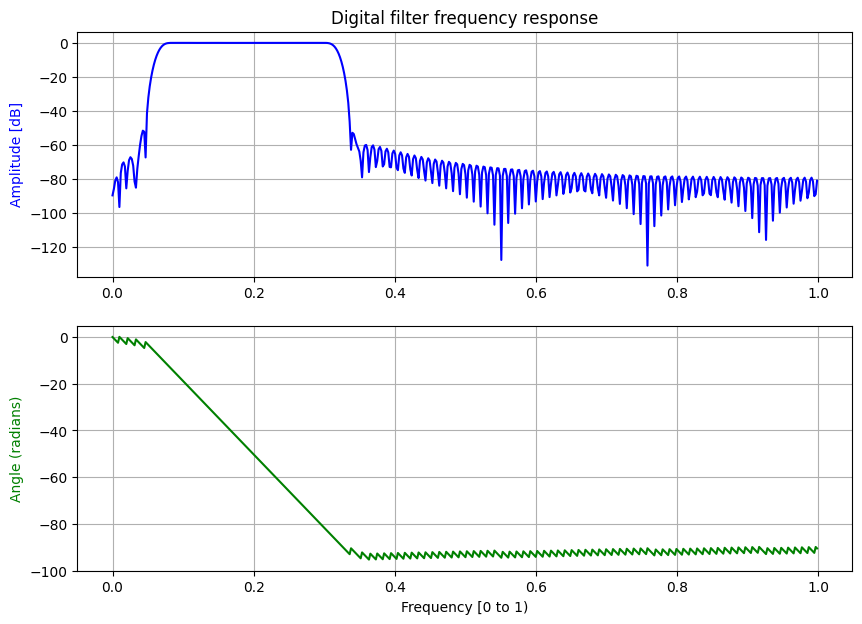

In [ ]:
import numpy as np
from scipy.signal import firwin
import matplotlib.pyplot as plt
from scipy.signal import freqz

fs = 250 
W1 = 8 
W2 = 40
Wn = [W1, W2]
N = 200
h = firwin(N+1, Wn, window="hamming", pass_zero="bandpass", fs=fs)
w, h_freqz = freqz(h)
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.plot(w/np.pi, 20*np.log10(abs(h_freqz)), 'b')
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude [dB]', color='b')
plt.grid(True)
plt.axis('tight')

# Subplot 2 - Phase response
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(h_freqz))
plt.plot(w/np.pi, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid(True)
plt.axis('tight')
plt.xlabel('Frequency [0 to 1)')

plt.show()

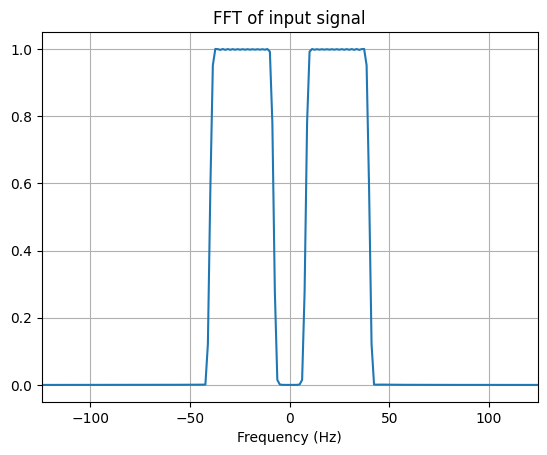

In [ ]:
X1 = np.fft.fftshift(np.fft.fft(h))
X2 = np.fft.fftshift(np.fft.fft(h_freqz))

N = len(X1)
w = 2*np.pi*np.arange(N)/N
w = np.fft.fftshift(w)
w = np.unwrap(w - 2*np.pi)
f = w*fs/(2*np.pi)

plt.figure(4)
plt.plot(f, np.abs(X1))
plt.title("FFT of input signal")
plt.xlabel("Frequency (Hz)")
plt.grid(True)
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

In [ ]:
def circular_convolve(signal, kernel):
    kernel_size = len(kernel)
    padded_signal = np.concatenate((signal, signal[:kernel_size-1]))
    return np.convolve(padded_signal, kernel, 'valid')

In [ ]:
def filter_signals(segments):
    filtered_segments = []
    for segment in segments:
        eeg_channels = segment[:, :22]
        sigs = []
        for i in range(eeg_channels.shape[1]):
            sigs.append(circular_convolve(eeg_channels[:, i], h))
        filtered_segments.append(sigs)
    return np.array(filtered_segments)

In [ ]:
eeg_filtered_a01_train = filter_signals(eeg_mi_a01_train)
eeg_filtered_a01_test = filter_signals(eeg_mi_a01_test)
eeg_filtered_a01_train.shape, eeg_filtered_a01_test.shape

((237, 22, 750), (228, 22, 750))

# 5. Análisis Exploratorio de Datos

## 5.1. Visualización de señales EEG

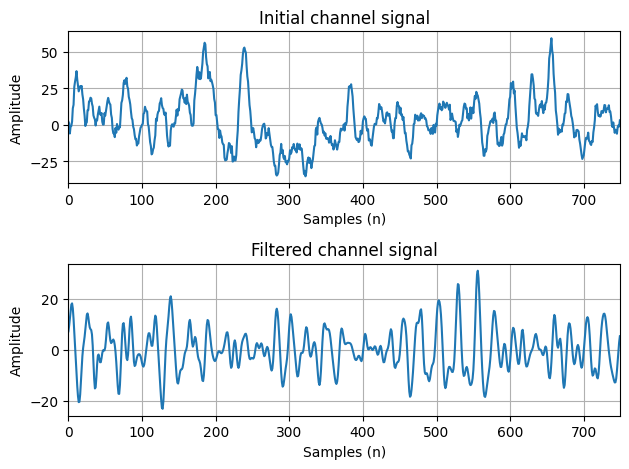

In [ ]:
rand = np.random.randint(0, 48)
raw = eeg_mi_a01_train[rand, :, :]
filtered = eeg_filtered_a01_train[rand, :, :]
n = np.arange(len(raw))
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(n, raw[:, 0])
plt.title('Initial channel signal')
plt.xlabel('Samples (n)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.autoscale(enable=True, axis='x', tight=True)
plt.subplot(2, 1, 2)
plt.plot(n, filtered[0, :])
plt.title('Filtered channel signal')
plt.xlabel('Samples (n)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.autoscale(enable=True, axis='x', tight=True)
plt.tight_layout()
plt.show()


## 5.2. Análisis de las señales en el dominio de la frecuencia

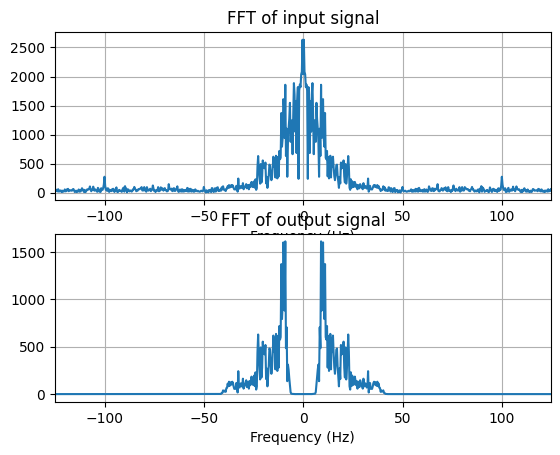

In [ ]:
X1 = np.fft.fftshift(np.fft.fft(raw[:, 0]))
X2 = np.fft.fftshift(np.fft.fft(filtered[0, :]))

N = len(X1)
w = 2*np.pi*np.arange(N)/N
w = np.fft.fftshift(w)
w = np.unwrap(w - 2*np.pi)
f = w*fs/(2*np.pi)

plt.figure(4)
plt.subplot(2, 1, 1)
plt.plot(f, np.abs(X1))
plt.title("FFT of input signal")
plt.xlabel("Frequency (Hz)")
plt.grid(True)
plt.autoscale(enable=True, axis='x', tight=True)

plt.subplot(2, 1, 2)
plt.plot(f, np.abs(X2))
plt.title("FFT of output signal")
plt.xlabel("Frequency (Hz)")
plt.grid(True)
plt.autoscale(enable=True, axis='x', tight=True)

plt.show()

# 6. Extracción de características

## 6.1. Características en el dominio del tiempo

## 6.2. Características en el dominio de la frecuencia

## 6.3. Características de tiempo-frecuencia

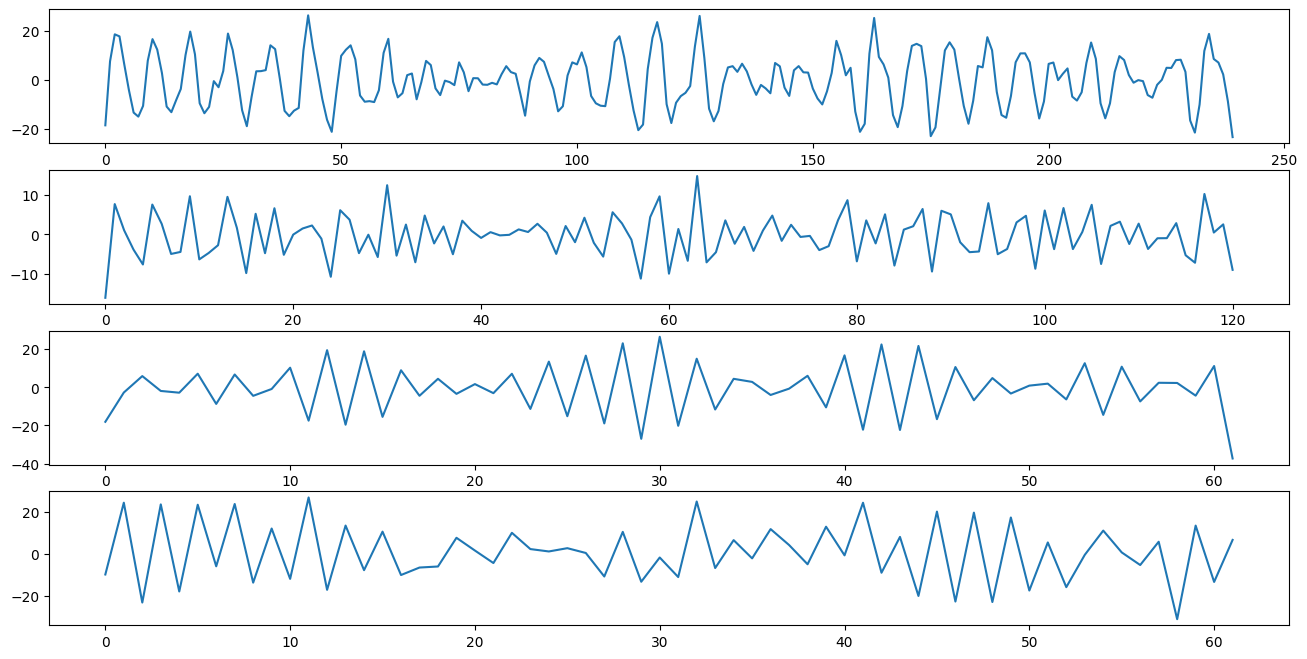

(237, 110)

In [ ]:
import pywt
from scipy.signal import resample
from scipy.stats import kurtosis, skew
X_train = []
for segment in eeg_filtered_a01_train:
    features = []
    for i, chn in enumerate(segment):
        chn = list(chn)
        chn = np.array(chn, dtype=float)
        chn = resample(chn, int(len(chn)*0.32))
        coeffs = pywt.wavedec(chn, "db2", level=2)
        cA2, cD2, cD1 = coeffs
        f1 = np.mean(cD2)
        f2 = np.var(cD2)
        f3 = np.sum(np.square(cD2))/np.sum(np.square(chn))
        f4 = kurtosis(cD2)
        f5 = skew(cD2)
        ff = [f1, f2, f3, f4, f5]
        features += ff
    X_train.append(features)
plt.figure(4, figsize=(16, 8))
plt.subplot(4, 1, 1)
plt.plot(np.arange(len(chn)), chn)
plt.subplot(4, 1, 2)
plt.plot(np.arange(len(cD1)), cD1)
plt.subplot(4, 1, 3)
plt.plot(np.arange(len(cA2)), cA2)
plt.subplot(4, 1, 4)
plt.plot(np.arange(len(cD2)), cD2)
plt.show()
X_train = np.array(X_train)
X_train.shape

In [ ]:
X_test = []
for segment in eeg_filtered_a01_test:
    features = []
    for chn in segment:
        chn = list(chn)
        chn = np.array(chn, dtype=float)
        chn = resample(chn, int(len(chn)*0.32))
        coeffs = pywt.wavedec(chn, "db2", level=2)
        cA2, cD2, cD1 = coeffs
        f1 = np.mean(cD2)
        f2 = np.var(cD2)
        f3 = np.sum(np.square(cD2))/np.sum(np.square(chn))
        f4 = kurtosis(cD2)
        f5 = skew(cD2)
        ff = [f1, f2, f3, f4, f5]
        features += ff
    X_test.append(features)
X_test = np.array(X_test)
X_test.shape

(228, 110)

In [ ]:
X = np.concatenate([X_train, X_test], axis=0)
X.shape

(465, 110)

In [ ]:
y = np.concatenate([y_a01_train, y_a01_test], axis=0)
y.shape

(465,)

## 6.4. Características estadísticas y espectros de orden superior

## 6.5. Separación en set de entrenamiento y testeo

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((372, 110), (93, 110), (372,), (93,))

## 6.6. Normalización de datos

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_train.shape, X_test.shape

((372, 110), (93, 110))

# 7. Selección de características

## 7.1. Reducción de dimensionalidad

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train.shape, X_test.shape

((372, 28), (93, 28))

## 7.2. Selección de características

# 8. Construcción del modelo

## 8.1. Elección del algoritmo de clasificación (cross-validation)

## 8.2. Entrenamiento del modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
y_train = list(y_train)
y_train = np.array(y_train, dtype=float)
y_test = list(y_test)
y_test = np.array(y_test, dtype=float)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

1.0

In [ ]:
rf.score(X_test, y_test)

0.3225806451612903

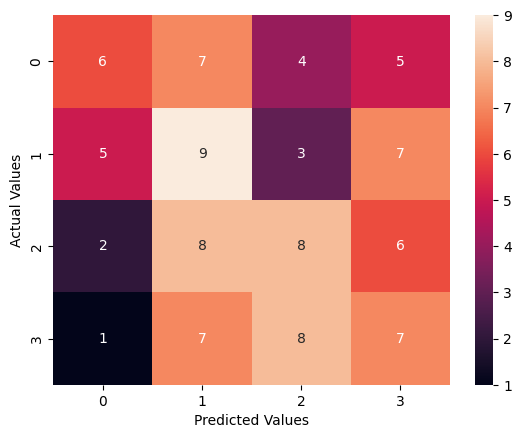

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, rf.predict(X_test))
fig = plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

## 8.3. Optimización de hiperparámetros

# 9. Conclusión y trabajo a futuro

# 10. Referencias